# Stateful system

In [1]:
import jax
import numpy as np
import matplotlib.pyplot as plt
from commplax import equalizer as eq, xcomm, plot as cplt
from gdbp import gdbp_base as gb, data as gdat, plot as gplt

In [2]:
data = gdat.load(1, 0, 4, 2)

In [3]:
# process via CDC+CMA/RDE+KF
z, mimo_w = eq.modulusmimo(eq.cdcomp(data.y, data.a['samplerate'], data.a['CD']))[:2]
z, (nfo, _) = eq.framekfcpr(z, w0=data.w0)
z, phi = eq.ekfcpr(z)

Text(0, 0.5, 'max($\\mathbf{|h|}$)')

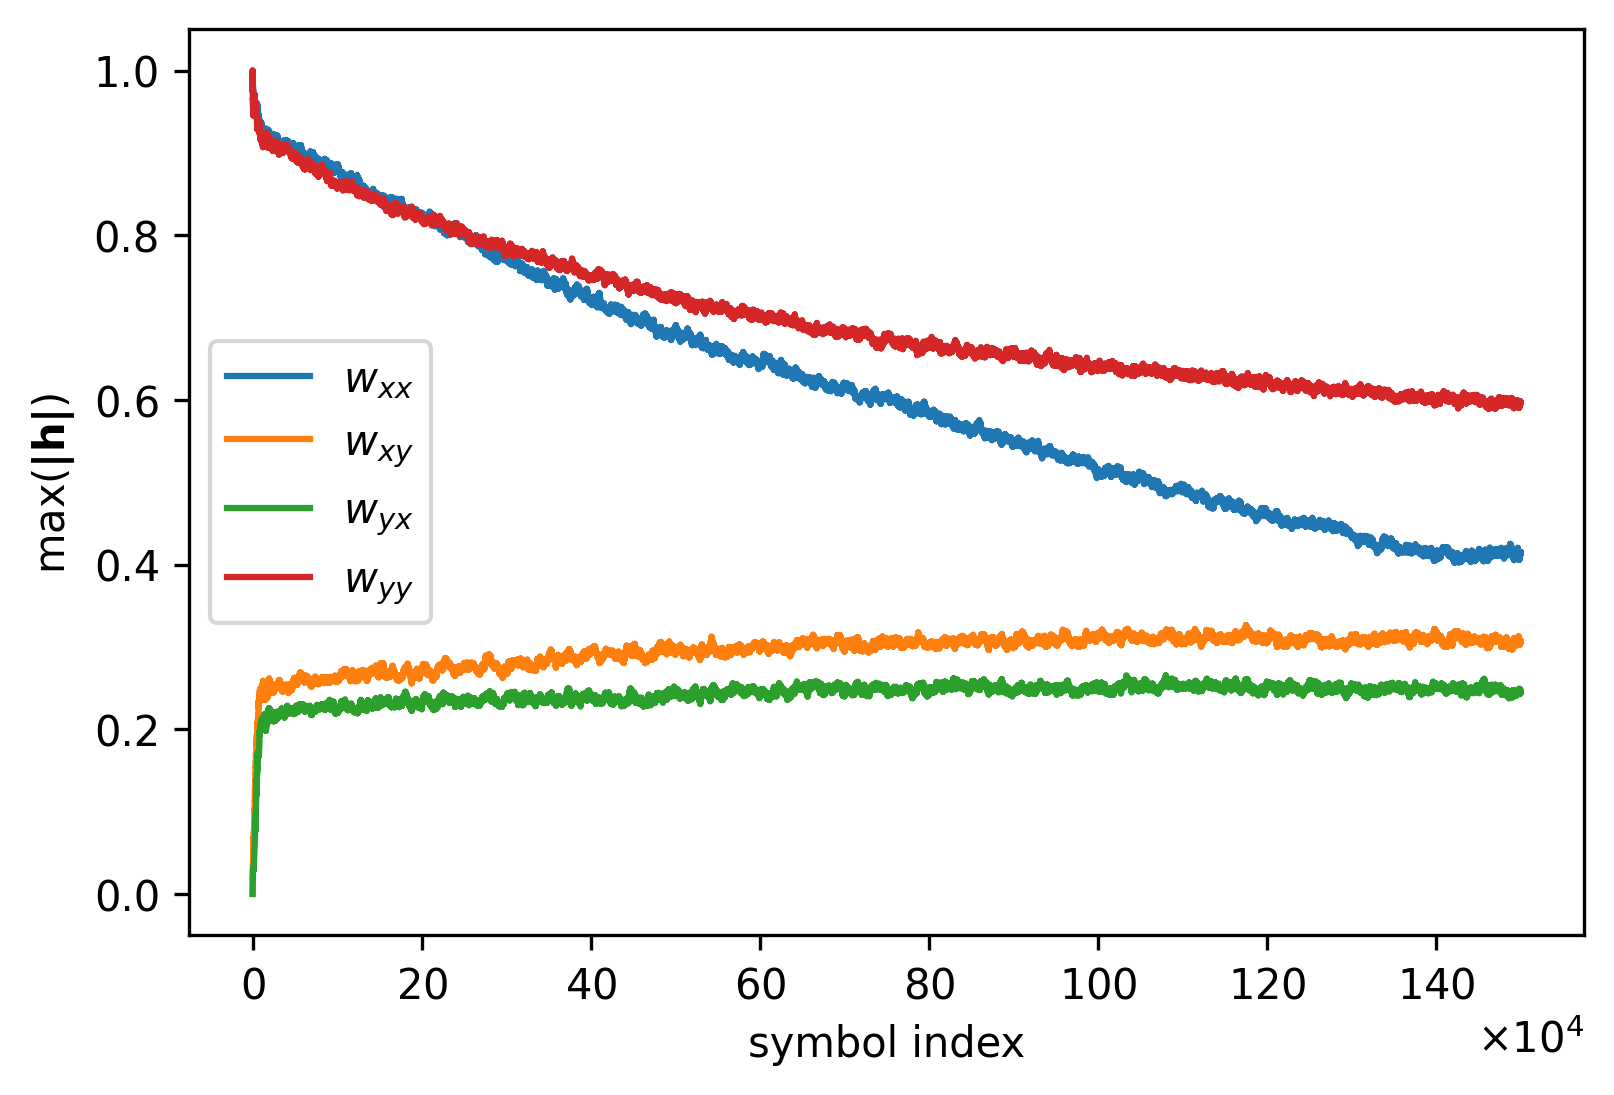

In [4]:
# MIMO dynamics
w_amp = np.max(np.abs(mimo_w), axis=-1)
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(w_amp[:, 0, 0], label=r'$w_{xx}$')
plt.plot(w_amp[:, 0, 1], label=r'$w_{xy}$')
plt.plot(w_amp[:, 1, 0], label=r'$w_{yx}$')
plt.plot(w_amp[:, 1, 1], label=r'$w_{yy}$')
plt.legend(loc="center left")

plt.ticklabel_format(axis='x', scilimits=(4, 4), useMathText=True)
plt.xlabel('symbol index')
plt.ylabel(r'max($\mathbf{|h|}$)')

(<matplotlib.patches.Rectangle at 0x7f8f68070f10>,
 (<matplotlib.patches.ConnectionPatch at 0x7f8f6807b220>,
  <matplotlib.patches.ConnectionPatch at 0x7f8f6807b970>))

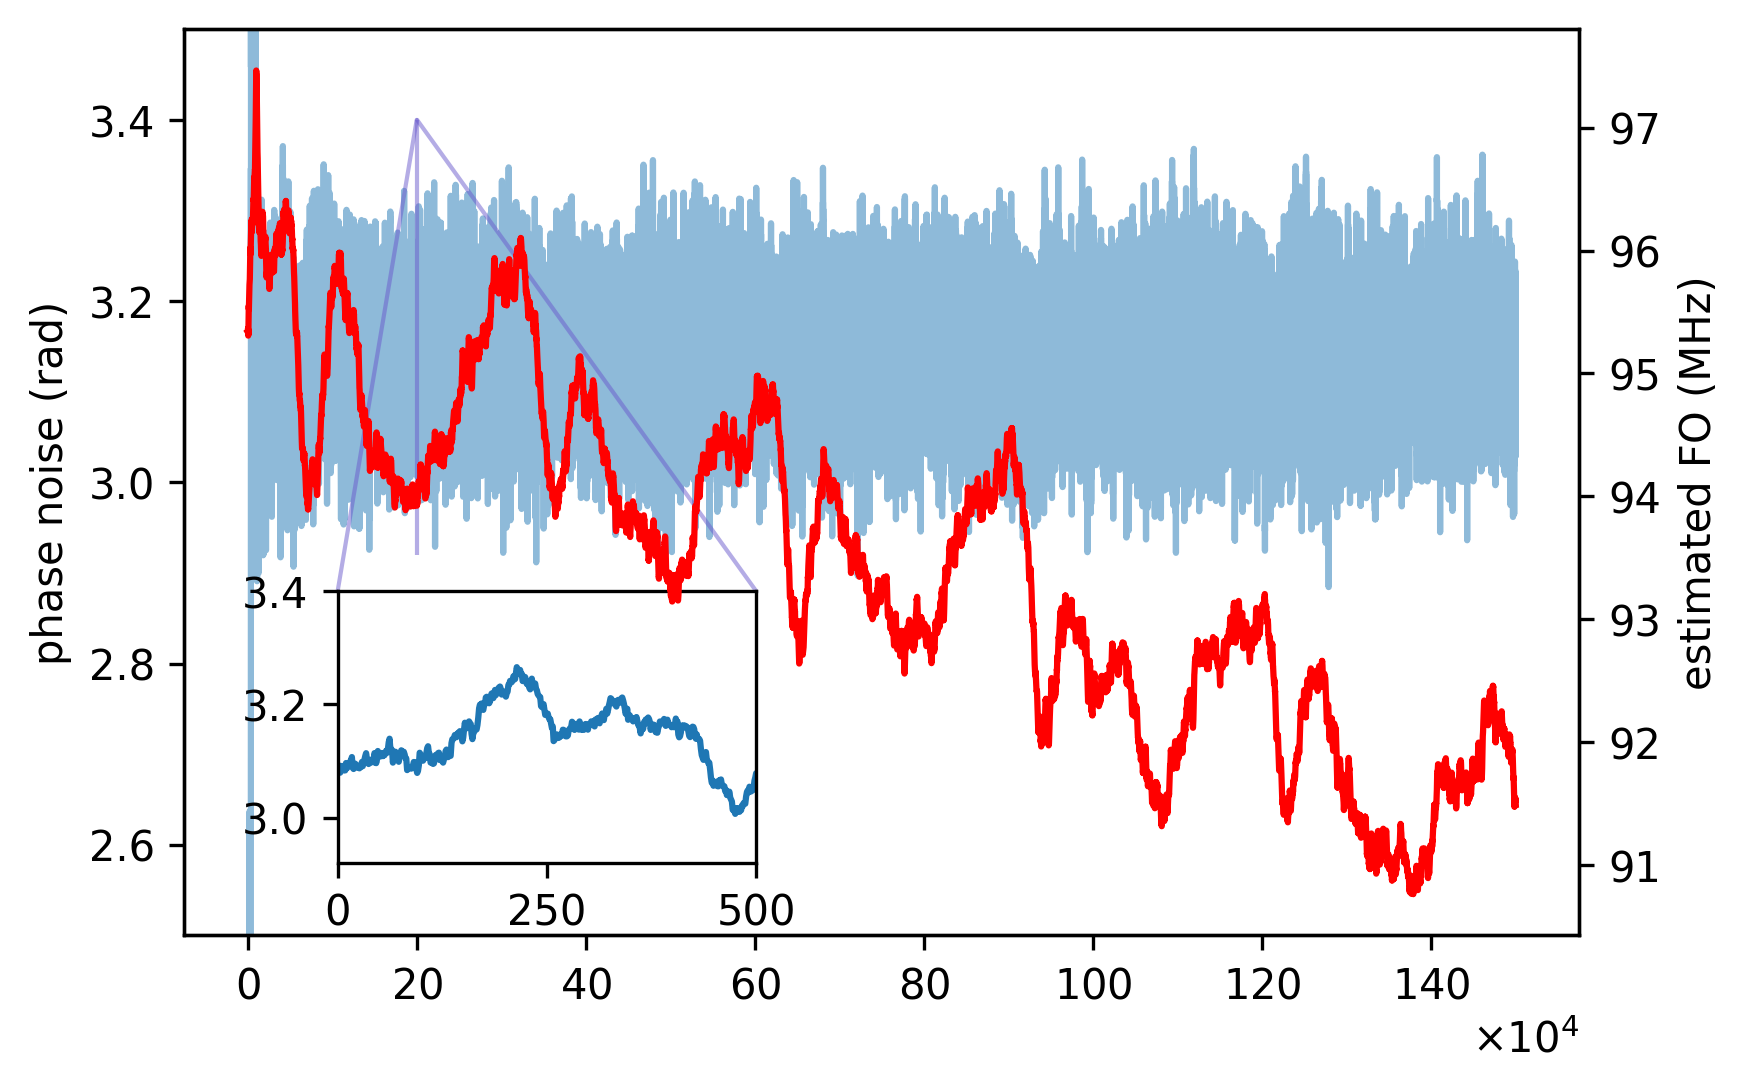

In [5]:
# estimated frequency offset
nfo_interp = np.interp(np.arange(z.shape[0]), np.arange(nfo.shape[0]) * 100, nfo[:, 0])
fo = nfo_interp * 36e9 / 2 / np.pi / 1e6

plt.figure(figsize=(6, 4), dpi=300)
plt.ticklabel_format(axis='x', scilimits=(4, 4), useMathText=True)

ax1 = plt.gca()
ax1.plot(phi.real[:, 0], alpha=0.5)
ax1.set_ylim([2.5, 3.5])
ax1.set_ylabel('phase noise (rad)')

ax2 = ax1.twinx()
ax2.plot(fo, color='red')
ax2.set_ylabel('estimated FO (MHz)')
ax2.set_xlabel('symbol index')
# ax2.set_ylim([90, 96.5])

axins = ax1.inset_axes([0.11, 0.08, 0.3, 0.3])
axins.plot(phi[:, 0].real)
axins.set_xlim(200000, 200500)
axins.set_ylim(2.92, 3.4)
axins.set_xticks([200000, 200250, 200500])
axins.set_xticklabels(['0', '250', '500'])
ax1.indicate_inset_zoom(axins, edgecolor="slateblue")